# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = ''  #the path where you downloaded the data
df = pd.read_csv("countries of the world.csv")

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [3]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-           <br>
2-           <br>
3-           <br>

In [7]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [8]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [9]:
df =  df.drop_duplicates()

In [10]:
df_copy['Population'] = df_copy['Population'].replace({'NAN':np.nan}).astype(float)
df_copy["Population"] = df_copy["Population"].fillna(value=df_copy["Population"].mean())
df_copy['Area (sq. mi.)'] = df_copy['Area (sq. mi.)'].replace({'NAN':np.nan}).astype(float)
df_copy["Area (sq. mi.)"] = df_copy["Area (sq. mi.)"].fillna(value=df_copy["Area (sq. mi.)"].mean())
df_copy['GDP ($ per capita)'] = df_copy['GDP ($ per capita)'].replace({'NAN':np.nan}).astype(float)
df_copy["GDP ($ per capita)"] = df_copy["GDP ($ per capita)"].fillna(value=df_copy["GDP ($ per capita)"].mean())
df_copy = df.dropna()


In [11]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    object 
 5   Coastline (coast/area ratio)        179 non-null    object 
 6   Net migration                       179 non-null    object 
 7   Infant mortality (per 1000 births)  179 non-null    object 
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    object 
 10  Phones (per 1000)                   179 non-null    object 
 11  Arable (%)                          179 non-n

In [13]:
df_copy.isna().sum()


Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Second issue**

In [52]:
datatypes = df_copy.dtypes

datatypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [14]:
columns=['Country','Region']
df_copy.drop(columns, inplace=True, axis=1)


In [15]:
df_copy

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
6,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,25730435,912050,"28,2","0,31","-0,04","22,2",4800.0,"93,4","140,1","2,95","0,92","96,13",2,"18,71","4,92","0,04","0,419","0,541"
219,84402966,329560,"256,1","1,05","-0,45","25,95",2500.0,"90,3","187,7","19,97","5,95","74,08",2,"16,86","6,22","0,209","0,41","0,381"
224,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [16]:
cols= df_copy.columns

In [17]:
#test 
for col in cols:
    df_copy[col] = df_copy[col].astype(str).str.replace(',', '.').astype(float)

In [18]:
df_copy

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,13477.0,102.0,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,69108.0,443.0,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,25730435.0,912050.0,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,84402966.0,329560.0,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,21456188.0,527970.0,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,11502010.0,752614.0,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [19]:
df_copy.info

<bound method DataFrame.info of      Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0    31056997.0        647500.0                        48.0   
1     3581655.0         28748.0                       124.6   
2    32930091.0       2381740.0                        13.8   
6       13477.0           102.0                       132.1   
7       69108.0           443.0                       156.0   
..          ...             ...                         ...   
218  25730435.0        912050.0                        28.2   
219  84402966.0        329560.0                       256.1   
224  21456188.0        527970.0                        40.6   
225  11502010.0        752614.0                        15.3   
226  12236805.0        390580.0                        31.3   

     Coastline (coast/area ratio)  Net migration  \
0                            0.00          23.06   
1                            1.26          -4.93   
2                            0.04          -0.39   
6  

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [20]:
from sklearn import preprocessing

In [21]:
scaler = preprocessing.StandardScaler().fit(df_copy)
X_scaled = scaler.transform(df_copy)



In [22]:
X_scaled

array([[-0.02402789,  0.05986479, -0.17943007, ...,  1.47823878,
        -0.3432598 , -1.05630628],
       [-0.23313231, -0.38471982, -0.123741  , ...,  0.49758315,
        -0.7149083 ,  0.14824877],
       [-0.00977248,  1.30594788, -0.20429386, ..., -0.37042959,
         2.22969138, -1.55265559],
       ...,
       [-0.09709601, -0.0260197 , -0.18480996, ..., -0.14514384,
         1.3148643 , -0.97761675],
       [-0.17285349,  0.13539111, -0.20320335, ...,  0.41807053,
         0.01409453, -0.39652487],
       [-0.16726125, -0.12473692, -0.19157116, ...,  0.14640242,
        -0.32181854,  0.14824877]])

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

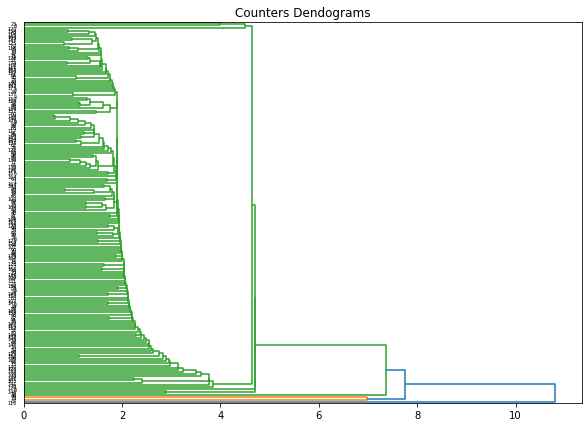

In [23]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=X_scaled , method='single',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [24]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
clustering = AgglomerativeClustering().fit(X_scaled)

print(silhouette_score(X_scaled,clustering.labels_))


0.23416741949483957


In [25]:
clustering.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1], dtype=int64)

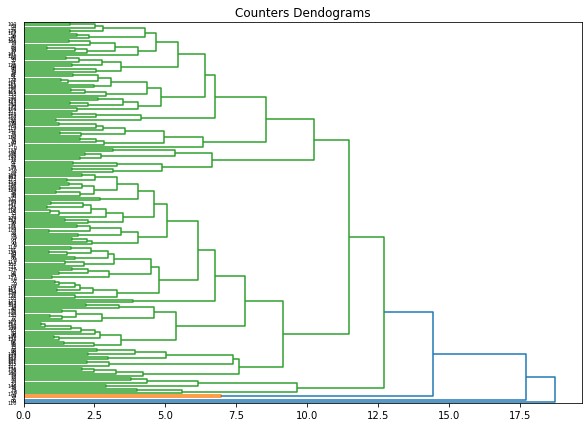

In [26]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=X_scaled , method='complete',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

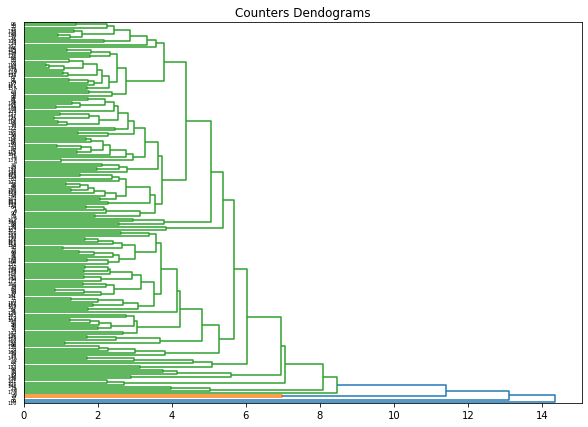

In [30]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=X_scaled , method='average',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 